# Intuition behind Diversity Active Learning
We want to select the most uncertain samples from the unlabeled pool. However, we also want to ensure that the selected samples are diverse. This is because if we select similar samples, we will not be able to learn much from them. 

Here we wish to work on images, so we can use their latent representation to select a pool point which is furthest in the latent dimension space from the train data.

Let's see how we can do this. Below is an example of random points in 2D space. We want to select the point which is furthest from the train data. We can do this by finding the point which has the maximum distance from the train data. This is the intuition behind diversity acquisition.

In [1]:
import torch
import matplotlib.pyplot as plt 
from astra.torch.al import Furthest, Centroid

In [2]:
if torch.cuda.is_available():
    num_gpu = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpu}")

    for i in range(num_gpu):
        device = torch.device(f"cuda:{i}")
        device_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {device_name}", device)
else:
    print("No GPUs available, using CPU.")

device = torch.device('cuda:2')
device

Number of available GPUs: 4
GPU 0: NVIDIA A100-SXM4-80GB cuda:0
GPU 1: NVIDIA A100-SXM4-80GB cuda:1
GPU 2: NVIDIA A100-SXM4-80GB cuda:2
GPU 3: NVIDIA A100-SXM4-80GB cuda:3


/home/jaiswalsuraj/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


device(type='cuda', index=2)

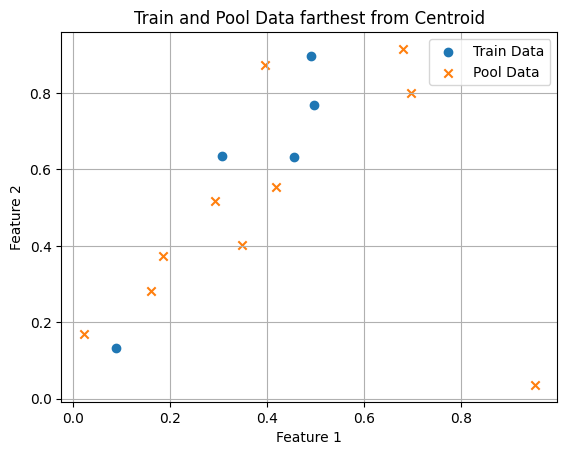

In [3]:
# Create dummy data
n_train = 5
n_pool = 10
n_features = 2
torch.manual_seed(0)
# Generate random train and pool features
train_features = torch.rand(n_train, n_features)
pool_features = torch.rand(n_pool, n_features)

plt.scatter(train_features[:, 0], train_features[:, 1], label='Train Data', marker='o')
plt.scatter(pool_features[:, 0], pool_features[:, 1], label='Pool Data', marker='x')

# plt.scatter(centroid_feature[0], centroid_feature[1], label='Centroid', marker='s', c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Train and Pool Data farthest from Centroid')
plt.grid()
plt.show()

In [4]:
n_samples = 2

In [5]:
acquisition = Furthest()
selected_indices = acquisition.acquire_scores(
                    train_features.cpu(), pool_features.cpu(), n=n_samples
                )
selected_indices 

[8, 9]

Index of the n farthest Pool Feature from train features: [8, 9]


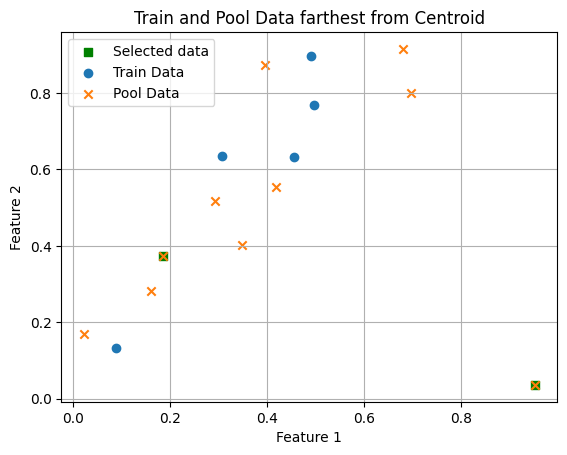

In [7]:
print("Index of the n farthest Pool Feature from train features:", selected_indices)

plt.scatter(pool_features[selected_indices][:,0], pool_features[selected_indices][:,1], label='Selected data', marker='s', c='green')
plt.scatter(train_features[:, 0], train_features[:, 1], label='Train Data', marker='o')
plt.scatter(pool_features[:, 0], pool_features[:, 1], label='Pool Data', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Train and Pool Data farthest from Centroid')
plt.grid()
plt.show()

In [8]:
acquisition = Centroid()
selected_indices = acquisition.acquire_scores(
                    train_features.cpu(), pool_features.cpu(), n=n_samples
                )
selected_indices

[8, 1]

Index of the n farthest Pool Feature from Centroid of train features: [8, 1]
Centroid of train features: tensor([0.3676, 0.6126])


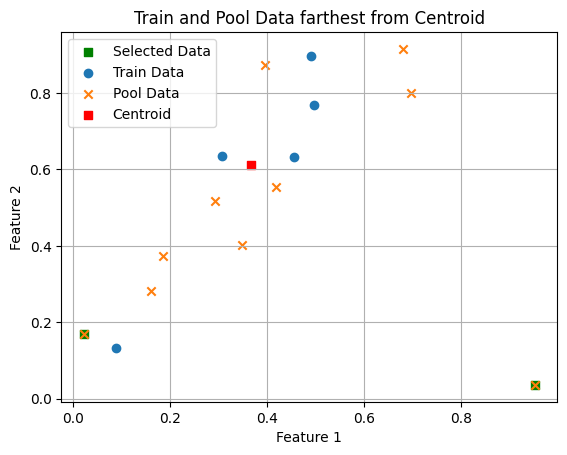

In [12]:
centroid_feature = torch.mean(train_features, dim=0) #.unsqueeze(0).squeeze()
print("Index of the n farthest Pool Feature from Centroid of train features:", selected_indices)
print('Centroid of train features:', centroid_feature)

plt.scatter(pool_features[selected_indices][:,0], pool_features[selected_indices][:,1], label='Selected Data', marker='s', c='green')
plt.scatter(train_features[:, 0], train_features[:, 1], label='Train Data', marker='o')
plt.scatter(pool_features[:, 0], pool_features[:, 1], label='Pool Data', marker='x')
plt.scatter(centroid_feature[0], centroid_feature[1], label='Centroid', marker='s', c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Train and Pool Data farthest from Centroid')
plt.grid()
plt.show()